In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

1.9.0


### Generate Torque Training Data and Labels 

In [56]:
# Parameter space restricting force vector lengths in y direction and defining length of door along x direction
x_min = 0
x_max = 10
y_min = -5
y_max = 5

def random_examples(N):
    """ Generate random force vector pairs
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    data = np.random.rand(N, 8) 
    data[:,0] *= x_max
    data[:,1] *= y_max
    data[:,2] *= x_max
    data[:,3] *= 0

    data[:,4] *= x_max
    data[:,5] *= y_min
    data[:,6] *= x_max
    data[:,7] *= 0
    
    return data

def perp_only_close(N):
    """ Generate random force vector pairs perpendicular to lever arm that result in 0 net torque
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    data = np.random.rand(N,8)
    data[:,0] *= x_max
    data[:,1] *= y_max
    data[:,2] = data[:,0]
    data[:,3] *= 0
    
    data[:,4] *= x_max
    data[:,5] = - data[:,0] * data[:,1] / data[:,4]
    data[:,6] = data[:,4]
    data[:,7] *= 0
    
    return data
    
def perp_only_open(N):
    """ Generate random force vector pairs perpendicular to lever arm that result in non-zero net torque
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    data = np.random.rand(N, 8) 
    data[:,0] *= x_max
    data[:,1] *= y_max
    data[:,2] *= data[:,0]
    data[:,3] *= 0

    data[:,4] *= x_max
    data[:,5] *= y_min
    data[:,6] = data[:,4]
    data[:,7] *= 0
    
    return data

def same_dist_close(N): 
    """ Generate random force vector pairs terminating at same point on lever arm that result in 0 net torque
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    data = np.random.rand(N, 8) 
    data[:,0] *= x_max
    data[:,1] *= y_max
    data[:,2] *= x_max
    data[:,3] *= 0

    data[:,4] *= x_max
    data[:,6] = data[:,2]
    data[:,5] = - data[:,2] * data[:,1] / data[:,6]
    data[:,7] *= 0
    
    return data

def same_dist_open(N):
    """ Generate random force vector pairs terminating at same point on lever arm that result in non-zero net torque
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    data = np.random.rand(N, 8) 
    data[:,0] *= x_max
    data[:,1] *= y_max
    data[:,2] *= x_max
    data[:,3] *= 0

    data[:,4] *= x_max
    data[:,5] *= y_max
    data[:,6] = data[:,2]
    data[:,7] *= 0
    
    return data
    
def same_mag_close(N): 
    """ Generate random force vector pairs with same magnitude that result in non-zero net torque
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    pass

def same_mag_open(N):
    """ Generate random force vector pairs with same magnitude that result in non-zero net torque
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    pass

N = 50000

N_rand = N
N_perp_open = N
N_perp_close = N
N_dist_close = N
N_dist_open = N
N_mag_close = 10
N_mag_open = 10

#N = N_rand + N_perp_open + N_perp_close + N_dist_close + N_dist_open + N_mag_close + N_mag_open

#TODO: Finish populating with data
data = np.vstack((random_examples(N_rand), perp_only_close(N_perp_close), perp_only_open(N_perp_open),
                    same_dist_close(N_dist_close), same_dist_open(N_dist_open))) 

labels = np.array([i[1] * i[2] + i[5] * i[6] == 0 for i in data]).astype(int)

N_test = 500
test_data = np.vstack((random_examples(N_test), perp_only_close(N_test), perp_only_open(N_test),
                    same_dist_close(N_test), same_dist_open(N_test))) 
test_labels = np.array([i[1] * i[2] + i[5] * i[6] == 0 for i in test_data]).astype(int)


### Preprocessing
- TODO: Normalize data for input into NN.

In [70]:
print(1 in labels)

True


### Create Model 
- TODO: Create model using NN architecture from tensorflow

In [71]:
print(data.shape)
print(labels.shape)

(250, 8)
(250,)


#### Model 1: 3 hidden layers

In [57]:
#TODO: Figure out optimal network architecture for this class of problem

model = keras.Sequential([
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(80, activation=tf.nn.relu),
    keras.layers.Dense(60, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [58]:
model.fit(data, labels, epochs=5)

Epoch 1/5
250000/250000 [==============================] - 13s 54us/step - loss: 0.1358 - acc: 0.9546
Epoch 2/5
250000/250000 [==============================] - 12s 47us/step - loss: 0.0911 - acc: 0.9719
Epoch 3/5
250000/250000 [==============================] - 12s 47us/step - loss: 0.0840 - acc: 0.9744
Epoch 4/5
250000/250000 [==============================] - 11s 46us/step - loss: 0.0807 - acc: 0.9753
Epoch 5/5
250000/250000 [==============================] - 11s 44us/step - loss: 0.0796 - acc: 0.9755


In [59]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc)

2500/2500 [==============================] - 0s 135us/step
Test accuracy: 0.9792


#### Model 2: 2 Hidden Layers

In [60]:
alpha = 2
model2 = keras.Sequential([
    keras.layers.Dense(66, activation=tf.nn.relu),
    keras.layers.Dense(44, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [62]:
model2.fit(data, labels, epochs=5)

Epoch 1/5
250000/250000 [==============================] - 11s 43us/step - loss: 0.0978 - acc: 0.9717
Epoch 2/5
250000/250000 [==============================] - 10s 42us/step - loss: 0.0914 - acc: 0.9733
Epoch 3/5
250000/250000 [==============================] - 10s 41us/step - loss: 0.0892 - acc: 0.9737
Epoch 4/5
250000/250000 [==============================] - 10s 41us/step - loss: 0.0846 - acc: 0.9752
Epoch 5/5
250000/250000 [==============================] - 10s 41us/step - loss: 0.0834 - acc: 0.9752


In [63]:
test_loss2, test_acc2 = model2.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc2)

2500/2500 [==============================] - 0s 141us/step
Test accuracy: 0.9784


#### Model 3: 

In [79]:
data.shape

(250000, 8)

In [88]:
r = 0.1
model3 = keras.Sequential([
    keras.layers.Dropout(r, input_shape=(8,)),
    keras.layers.Dense(80, activation=tf.nn.relu),
    keras.layers.Dense(60, activation=tf.nn.relu),
    keras.layers.Dense(40, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [106]:
history = model3.fit(data, labels, epochs=10, validation_data=(test_data,test_labels))

Train on 250000 samples, validate on 2500 samples
Epoch 1/10
250000/250000 [==============================] - 13s 53us/step - loss: 0.1434 - acc: 0.9374 - val_loss: 0.0686 - val_acc: 0.9804
Epoch 2/10
250000/250000 [==============================] - 13s 52us/step - loss: 0.1414 - acc: 0.9379 - val_loss: 0.0694 - val_acc: 0.9784
Epoch 3/10
250000/250000 [==============================] - 13s 53us/step - loss: 0.1400 - acc: 0.9385 - val_loss: 0.0671 - val_acc: 0.9804
Epoch 4/10
250000/250000 [==============================] - 13s 52us/step - loss: 0.1398 - acc: 0.9386 - val_loss: 0.0669 - val_acc: 0.9796
Epoch 5/10
250000/250000 [==============================] - 13s 53us/step - loss: 0.1409 - acc: 0.9384 - val_loss: 0.0716 - val_acc: 0.9788
Epoch 6/10
250000/250000 [==============================] - 14s 56us/step - loss: 0.1392 - acc: 0.9389 - val_loss: 0.0675 - val_acc: 0.9800
Epoch 7/10
250000/250000 [==============================] - 13s 54us/step - loss: 0.1396 - acc: 0.9392 - val_l

In [107]:
test_loss3, test_acc3 = model3.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc3)

2500/2500 [==============================] - 0s 20us/step
Test accuracy: 0.9808


In [108]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


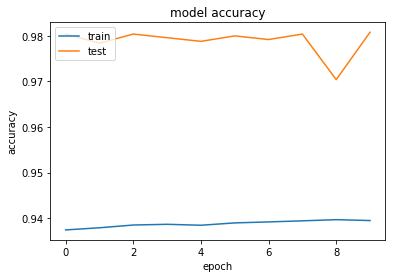

In [109]:
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

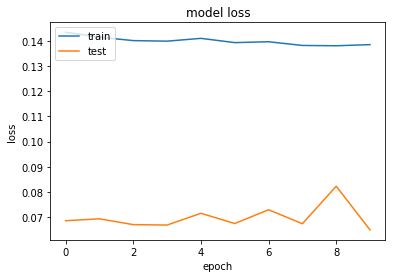

In [110]:
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Small Data Model 
- Low complexity (high bias) model for small data
- Same number of layers as features at least (in this case, 8). 